In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
airData = pd.read_csv("air_training.csv")

In [3]:
airData

,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,Ease.of.Online.booking,...,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
0,1,Female,Loyal Customer,56,Business travel,Business,632,2,2,2,...,4,4,5,4,5,4,3,0,0.0,satisfied
1,2,Male,Loyal Customer,49,Business travel,Eco,544,3,1,1,...,3,1,5,4,5,5,3,0,0.0,satisfied
2,3,Male,Loyal Customer,58,Personal Travel,Eco,617,3,0,3,...,2,4,3,5,4,4,2,0,0.0,neutral or dissatisfied
3,4,Male,Loyal Customer,53,Business travel,Business,2210,1,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
4,5,Male,disloyal Customer,25,Business travel,Eco,604,3,4,2,...,1,4,1,1,5,4,1,97,92.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,Female,Loyal Customer,66,Personal Travel,Eco,994,3,1,3,...,1,1,3,1,1,1,3,0,0.0,neutral or dissatisfied
39996,39997,Female,Loyal Customer,54,Business travel,Business,1521,5,5,5,...,4,4,4,4,4,4,5,0,0.0,satisfied
39997,39998,Male,Loyal Customer,43,Business travel,Business,3048,5,5,5,...,2,2,2,2,3,2,3,0,0.0,satisfied
39998,39999,Male,Loyal Customer,50,Personal Travel,Eco Plus,1979,3,3,3,...,5,5,1,5,4,1,5,4,2.0,neutral or dissatisfied


In [4]:
#check numerical and categorical features
airData.dtypes

id                                     int64
Gender                                object
Customer.Type                         object
Age                                    int64
Type.of.Travel                        object
Class                                 object
Flight.Distance                        int64
Inflight.wifi.service                  int64
Departure.Arrival.time.convenient      int64
Ease.of.Online.booking                 int64
Gate.location                          int64
Food.and.drink                         int64
Online.boarding                        int64
Seat.comfort                           int64
Inflight.entertainment                 int64
On.board.service                       int64
Leg.room.service                       int64
Baggage.handling                       int64
Checkin.service                        int64
Inflight.service                       int64
Cleanliness                            int64
Departure.Delay.in.Minutes             int64
Arrival.De

In [4]:
#check number of missing values
airData.isna().sum()

id                                     0
Gender                                 0
Customer.Type                          0
Age                                    0
Type.of.Travel                         0
Class                                  0
Flight.Distance                        0
Inflight.wifi.service                  0
Departure.Arrival.time.convenient      0
Ease.of.Online.booking                 0
Gate.location                          0
Food.and.drink                         0
Online.boarding                        0
Seat.comfort                           0
Inflight.entertainment                 0
On.board.service                       0
Leg.room.service                       0
Baggage.handling                       0
Checkin.service                        0
Inflight.service                       0
Cleanliness                            0
Departure.Delay.in.Minutes             0
Arrival.Delay.in.Minutes             123
satisfaction                           0
dtype: int64

In [5]:
airData.drop("id", axis=1, inplace=True)
airData.dropna(inplace=True)    #there are only 123 missing values, let's just drop them

airData.shape   # we have 39,877 rows of data left

(39877, 23)

In [6]:
# get dummy variables for categorical features

Gender_dummy = pd.get_dummies(airData["Gender"], drop_first=True)

Customer_dummy = pd.get_dummies(airData["Customer.Type"], drop_first=True)

TravelType_dummy = pd.get_dummies(airData["Type.of.Travel"], drop_first=True)

Class_dummy = pd.get_dummies(airData["Class"], drop_first=True)

In [7]:
# concatenate the dummy variables to original dataset and remove the original columns

airData = pd.concat([airData, Gender_dummy, Customer_dummy, TravelType_dummy, Class_dummy], axis=1)


In [8]:
#drop columns 
airData.drop(["Gender", "Customer.Type", "Type.of.Travel", "Class"], axis=1, inplace=True)

In [9]:
# %% change the response variable to numerical

num_satisfaction = {"satisfaction": {"satisfied": 1, "neutral or dissatisfied": 0}}

airData = airData.replace(num_satisfaction)


In [10]:
airData.head()

,Age,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,Food.and.drink,Online.boarding,Seat.comfort,Inflight.entertainment,...,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,56,632,2,2,2,2,2,4,4,4,...,4,3,0,0.0,1,0,0,0,0,0
1,49,544,3,1,1,1,3,3,3,3,...,5,3,0,0.0,1,1,0,0,1,0
2,58,617,3,0,3,3,2,3,2,2,...,4,2,0,0.0,0,1,0,1,1,0
3,53,2210,1,1,1,1,4,5,4,4,...,4,5,0,0.0,1,1,0,0,0,0
4,25,604,3,4,2,2,1,2,1,1,...,4,1,97,92.0,0,1,1,0,1,0


In [11]:
#setting up the X varibale and response varibale 
X = airData.drop("satisfaction", axis=1)

y = airData.satisfaction


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 862)


### Sklearn simple Pipeline 

In [13]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svm_clf', SVC(kernel="linear", random_state = 862))])


pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(kernel='linear', random_state=862))])

In [285]:
pipeline.predict(X_test)

array([1, 1, 0, ..., 0, 1, 1])

In [286]:
print(pipeline.score(X_test, y_test)) #88%

0.8818956870611836


- Notes 
The pipeline would pass the training data through scaler object and scale the data, then fit the data on the model given using the different hyperparameter combination. It would also do cross validation , and give out the best estimator 

### Without using pipeline and GSCV

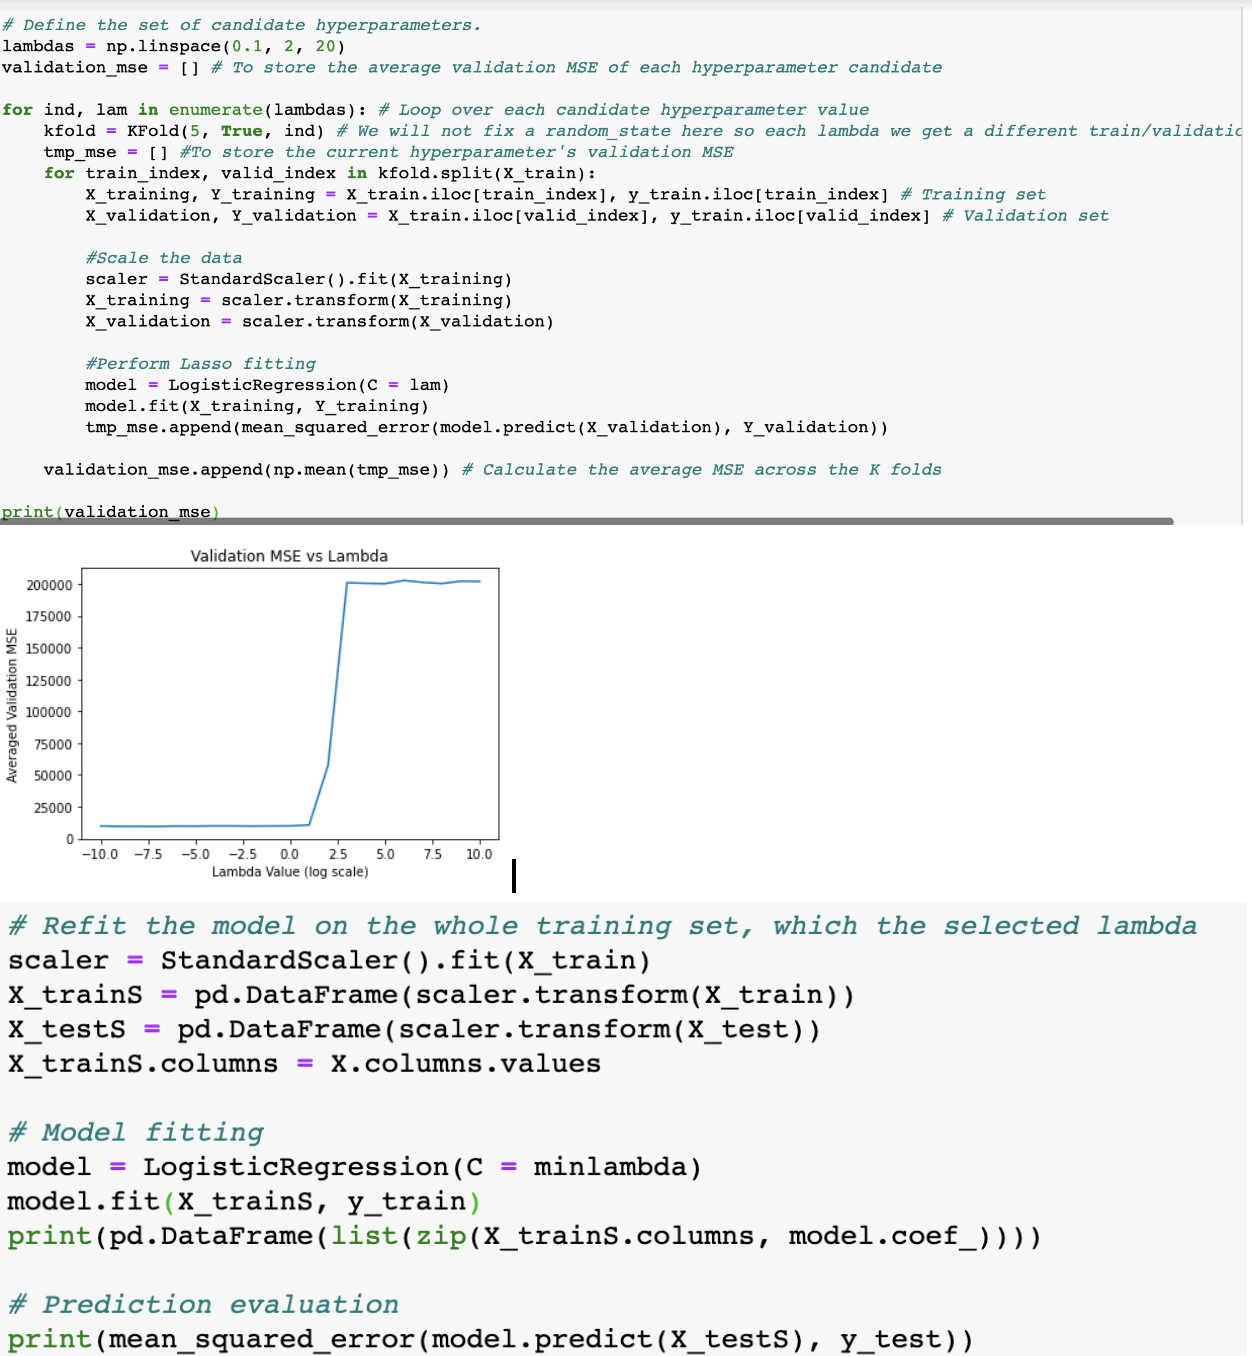

### With Sklearn pipeline and Grid Search CV

In [14]:
#use pipeline as an estimator 
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('log_clf', LogisticRegression(solver="liblinear", random_state = 862))])

#define model parameters to be tuned. Parameters are named by the estimator's name separated by '__'
param_grid = {'log_clf__C' : np.linspace(0.1, 2, 20), 
              'log_clf__solver' : ["newton-cg", "lbfgs", "liblinear"]} #smaller C values specify stronger regularization.

logistic_clf = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1) #pass the estimator and param_grid

logistic_clf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_clf',
                                        LogisticRegression(random_state=862,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'log_clf__solver': ['newton-cg', 'lbfgs',
                                             'liblinear']})

In [15]:
print("Best parameters for LR model are {}".format(logistic_clf.best_params_))

Best parameters for LR model are {'log_clf__C': 0.1, 'log_clf__solver': 'liblinear'}


In [16]:
#get predictions using .predict
logistic_clf.predict(X_test)

array([1, 1, 0, ..., 0, 1, 1])

In [17]:
#Score
print("Logistic regression score : {}".format(np.mean(logistic_clf.predict(X_test) == y_test)))

Logistic regression score : 0.8821464393179539


# Stacking Model

### Approach : 

1. The idea is to split the dataset into train and test first, then split the train set into two equal training sets for training the weak learners.

2. After training the weak learners and predicting on train2 data, use those predictions as input to the blender.

3. Finally evaluate the whole model using the test set (Pass the test set through the weak learners pipeline and then the Neural network blender model).



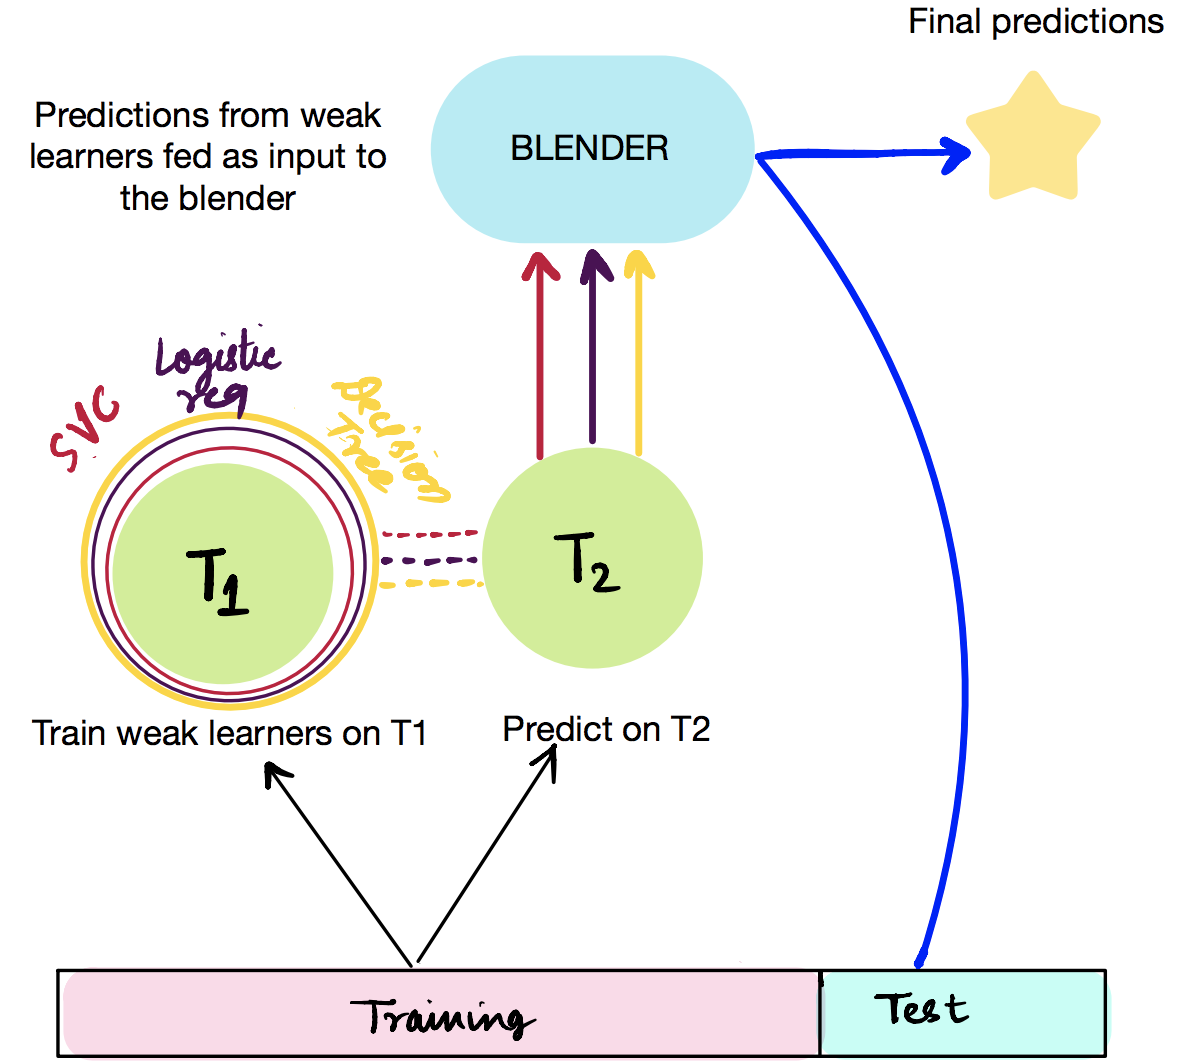

In [18]:
# Split the original X and y for Stacking model 

# First a 80-20 split and then the 80% data is split into two equal parts for training and evaluating the weak leaners

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X, y, test_size = 0.2, random_state = 862)

X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train_S, y_train_S, test_size = 0.5, random_state = 862)

## Training Weak learner 1 : SVC

In [19]:
#Training weak learner 1 and making predictions

scaler = StandardScaler()
svc = SVC(random_state = 862)

pipe = Pipeline(steps = [('scaler', scaler), ('svm_clf', svc)])

param_grid = {'svm_clf__C' : [2.0]} # np.linspace(0.1, 2, 10)

gsc = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

gsc.fit(X_train_1, y_train_1) #fit the model on T1


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf', SVC(random_state=862))]),
             n_jobs=-1, param_grid={'svm_clf__C': [2.0]})

In [20]:
prediction_svc = gsc.predict(X_train_2) #prediction on T2
prediction_svc

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
score_svc = gsc.score(X_train_2, y_train_2) #score on T2
score_svc #94%

0.9433891292082001

## Training Weak learner 2 : Logistic Regression

In [22]:
#Training weak learner 2 and making predictions
scaler = StandardScaler()
logistic = LogisticRegression(random_state = 862)

pipe = Pipeline(steps=[("scaler", scaler),("logistic", logistic)])
param_grid = {

            'logistic__solver': ['sag','lbfgs','liblinear'],

            'logistic__C': [0.1,1,10]

            }

gsc = GridSearchCV(pipe, param_grid, n_jobs=-1, cv = 5, scoring ='accuracy')
gsc.fit(X_train_1, y_train_1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=862))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 1, 10],
                         'logistic__solver': ['sag', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [23]:
gsc.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1, random_state=862, solver='sag'))])

In [24]:
prediction_lr = gsc.predict(X_train_2)
prediction_lr

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
score_lr = gsc.score(X_train_2, y_train_2)
score_lr #87%


0.8714814118237101

## Training Weak learner 3 : Decision Tree

In [26]:
#Training weak learner 3 and making predictions

scaler = StandardScaler()
dt = DecisionTreeClassifier(random_state=862)

pipe = Pipeline(steps=[("scaler", scaler),("dt", dt)])

param_grid = {

            'dt__max_features':[16,18],

            'dt__criterion': ['gini', 'entropy'],

            'dt__min_samples_leaf': [11,13]

            }

gsc = GridSearchCV(pipe, param_grid, n_jobs=-1, cv = 5, scoring ='accuracy')

gsc_model = gsc.fit(X_train_1, y_train_1)


In [27]:
gsc.best_params_

{'dt__criterion': 'entropy',
 'dt__max_features': 18,
 'dt__min_samples_leaf': 11}

In [28]:
gsc.best_estimator_[1]

DecisionTreeClassifier(criterion='entropy', max_features=18,
                       min_samples_leaf=11, random_state=862)

In [29]:
#prediction on T2
prediction_dt = gsc.predict(X_train_2)
prediction_dt



array([0, 0, 0, ..., 1, 1, 0])

In [30]:
score_dt = gsc.score(X_train_2, y_train_2)
score_dt #93

0.9375587737445928

In [31]:
#store predictions in a dataframe 
names = ['SVC', 'LogisticRegression', 'DecisionTreeClassifier', ]

predictions = [prediction_svc, prediction_lr, prediction_dt]

weak_predictions = pd.DataFrame()

for name, pred in zip(names,predictions):

        weak_predictions[name] = pred

In [32]:
weak_predictions

,SVC,LogisticRegression,DecisionTreeClassifier
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
15946,0,0,0
15947,0,0,0
15948,1,1,1
15949,0,0,1


# Blender


### Tried two different blender models 
1. Random Forest 
2. Advanced - A Neural network

In [33]:
#Blender 1 : Random Forest
blender_1 = RandomForestClassifier(random_state=862)
blender_1.fit(weak_predictions, y_train_2)

RandomForestClassifier(random_state=862)

In [34]:
# Blender 2  : Using Neural Network 
from tensorflow.random import set_seed
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout, Flatten
import tensorflow as tf
from tensorflow.random import set_seed

set_seed(862)

blender = Sequential()
blender.add(Dense(3, input_dim = 3, activation = 'relu'))
blender.add(Dense(1, activation = 'sigmoid'))
blender.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


2022-07-07 11:21:44.537314: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
blender.fit(weak_predictions, y_train_2, epochs= 20, batch_size = 100)


2022-07-07 11:22:07.428989: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
160/160 [==============================] - 1s 1ms/step - loss: 0.5902 - accuracy: 0.9082
Epoch 2/20
160/160 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.9108
Epoch 3/20
160/160 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.9108
Epoch 4/20
160/160 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.9108
Epoch 5/20
160/160 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.9108
Epoch 6/20
160/160 [==============================] - 0s 1ms/step - loss: 0.3104 - accuracy: 0.9342
Epoch 7/20
160/160 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.9418
Epoch 8/20
160/160 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.9418
Epoch 9/20
160/160 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.9418
Epoch 10/20
160/160 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.9418

## Evaluate the model on test set

In [36]:
#scale the training set 
scaler1 = StandardScaler()

X_train_S_scaled = scaler1.fit_transform(X_train_S)
X_test_scaled = scaler1.transform(X_test_S)

In [37]:
# Passing the training set through weak learner's best hyperparameter value and storing the predictions in a dataframe

names = ['SVC', 'LogisticRegression', 'DecisionTreeClassifier']

best_models = [SVC(C = 2.0, random_state=862), 
               LogisticRegression(C=1, random_state=862, solver='sag'),
               DecisionTreeClassifier(criterion='entropy', max_features=18,
                       min_samples_leaf=11, random_state=862)]

weak_predictions_test = pd.DataFrame()

for name, model in zip(names,best_models):
    model.fit(X_train_S_scaled,y_train_S) #fit the model on train and predict on test
    weak_predictions_test[name] = model.predict(X_test_scaled)

In [38]:
#Now predict through blender
weak_predictions_test

,SVC,LogisticRegression,DecisionTreeClassifier
0,1,1,1
1,1,1,1
2,0,0,0
3,1,1,1
4,1,0,1
...,...,...,...
7971,1,1,1
7972,0,0,0
7973,0,0,0
7974,0,1,0


### Final Predictions on test set 

In [39]:
pred_test_1 = blender_1.predict(weak_predictions_test)
pred_test_1

array([1, 1, 0, ..., 0, 0, 1])

In [40]:
print("Accuracy on Random Forest stacking model is {}%".format(round(blender_1.score(weak_predictions_test,y_test_S)*100, 2)))

Accuracy on Random Forest stacking model is 94.9%


In [41]:
#predictions on neural network blender
pred_test_2 = (blender.predict(weak_predictions_test) > 0.5).astype('int32')
pred_test_2

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [42]:
print("Accuracy on Neural Network stacking model is {}%".format(round(np.mean(pred_test_1.reshape(len(y_test_S),) == y_test_S)*100, 2)))

#94.82%

Accuracy on Neural Network stacking model is 94.9%


# Comparison code

In [241]:
from sklearn.svm import SVC 

scaler = StandardScaler()
svc = SVC(random_state = 862)

pipe = Pipeline(steps = [('scaler', scaler), ('svm_clf', svc)])

param_grid = {'svm_clf__C' : [2.0]} # np.linspace(0.1, 2, 10)

gsc = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

gsc.fit(X_train_S, y_train_S) 

score_svc = gsc.score(X_test_S, y_test_S) #score on T2
score_svc #94%


0.9489719157472417

In [226]:
scaler = StandardScaler()
logistic = LogisticRegression(random_state = 862)

pipe = Pipeline(steps=[("scaler", scaler),("logistic", logistic)])
param_grid = {
            'logistic__solver': ['sag','lbfgs','liblinear'],

            'logistic__C': [0.1,1,10]}

gsc = GridSearchCV(pipe, param_grid, n_jobs=-1, cv = 5, scoring ='accuracy')
gsc.fit(X_train_S, y_train_S) 

score_svc = gsc.score(X_test_S, y_test_S) #score on T2
score_svc #88%

0.8821464393179539

In [227]:
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
dt = DecisionTreeClassifier(random_state=862)

pipe = Pipeline(steps=[("scaler", scaler),("dt", dt)])

param_grid = {
            'dt__max_features':[16,18],

            'dt__criterion': ['gini', 'entropy'],

            'dt__min_samples_leaf': [11,13]}

gsc = GridSearchCV(pipe, param_grid, n_jobs=-1, cv = 5, scoring ='accuracy')

gsc.fit(X_train_S, y_train_S) 

score_svc = gsc.score(X_test_S, y_test_S) #score on T2
score_svc #94%

0.9408224674022067